<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Определение-стоимости-автомобилей" data-toc-modified-id="Определение-стоимости-автомобилей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Определение стоимости автомобилей</a></span><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Удаление-ненужных-признаков" data-toc-modified-id="Удаление-ненужных-признаков-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Удаление ненужных признаков</a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Типы данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 


## Постановка задачи
    

**Цель:**
 
Разработать модель, которая могла бы максимально точно и быстро предсказывать рыночную стоимость автомобиля. 
 
**План работы:**
 
- Подготовка, предобработка данных
- Обучение нескольких моделей, вариация гиперпарметров
- Анализ качества предсказаний и скорости каждой модели, выбор наидучшей
 
**Данные:**
 
В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Датасет предоставлен сервисом по продаже автомобилей с пробегом «Не бит, не крашен».

**Признаки, с которыми предстоит работать:**

*DateCrawled* — дата скачивания анкеты из базы

*VehicleType* — тип автомобильного кузова

*RegistrationYear* — год регистрации автомобиля

*Gearbox* — тип коробки передач

*Power* — мощность (л. с.)

*Model* — модель автомобиля

*Kilometer* — пробег (км)

*RegistrationMonth* — месяц регистрации автомобиля

*FuelType* — тип топлива

*Brand* — марка автомобиля

*Repaired* — была машина в ремонте или нет

*DateCreated* — дата создания анкеты

*NumberOfPictures* — количество фотографий автомобиля

*PostalCode* — почтовый индекс владельца анкеты (пользователя)

*LastSeen* — дата последней активности пользователя


## Подготовка данных

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from feature_engine.selection import DropCorrelatedFeatures, DropDuplicateFeatures

from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from catboost import Pool, CatBoostRegressor, cv
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

from sklearn.metrics import make_scorer

In [3]:
RS = 12345

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
display(data.head(10))

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


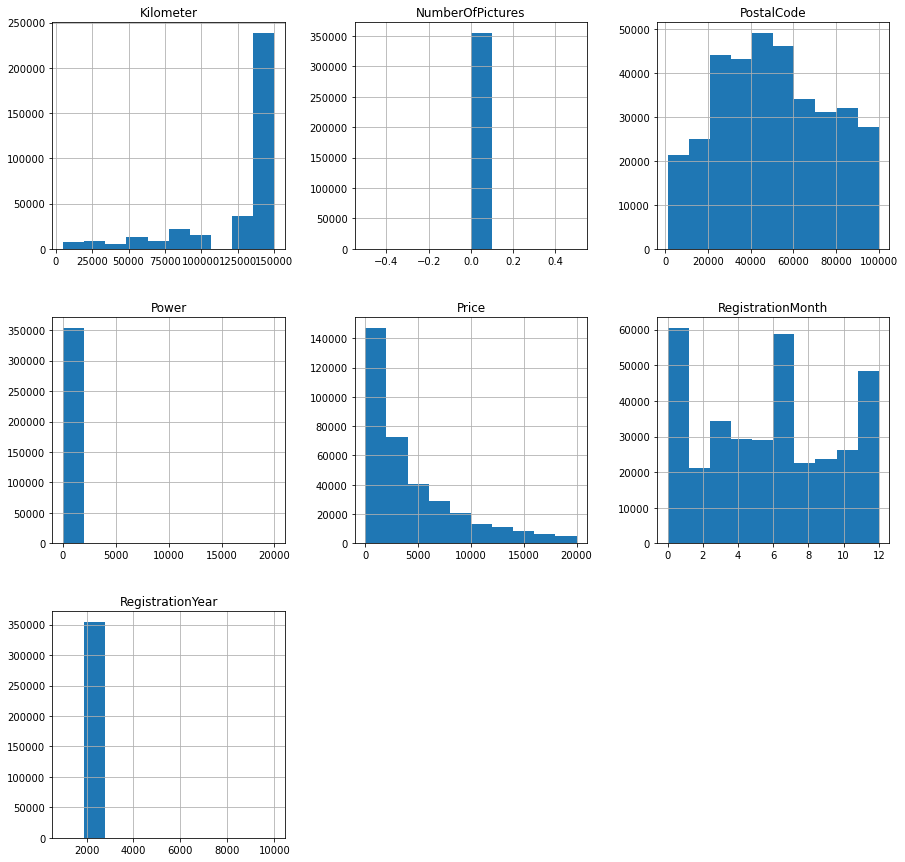

In [10]:
data.hist(figsize=(15, 15));

**Можно заметить, что** у всех машин достаточно большой пробег, это логичный результат, ведь вервис продает именно подержанные автомобили. Цена автомобилей варируется от самых маленеьких до 20000. Большее количество авутомобилей имеют цену, которая не превышает 4000. Самыми популярным месяцами регистрации являются январь, июнь и декабрь. Между остальными меясцами регистрации распределены равномерно. 

In [11]:
print(data.shape)

(354369, 16)


### Обработка пропусков

In [12]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
DateCrawled,0.000000
Price,0.000000
VehicleType,11.000000
RegistrationYear,0.000000
Gearbox,6.000000
Power,0.000000
Model,6.000000
Kilometer,0.000000
RegistrationMonth,0.000000
FuelType,9.000000


In [13]:
data['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [14]:
data['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [15]:
fuels = list(data['FuelType'].unique())

In [16]:
data['FuelType'].value_counts()

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [17]:
# Проверим, сильно ли отличаются цены в зависимости от типа топлива
for fuel in fuels:
    print(fuel, data[data['FuelType']==fuel]['Price'].mean())
    

petrol 3750.024432406449
gasoline 6579.760139789303
nan nan
lpg 4040.0898305084747
other 2312.029411764706
hybrid 9465.356223175966
cng 4464.661946902655
electric 6657.711111111111


In [18]:
columns= ['Brand', 'VehicleType']

In [19]:
# посмотрим какому топливу отдают предпочтение разные бренды, а также разные типы автомобмлей
for fuel in fuels:
    for column in columns:
        print( fuel,  data[data['FuelType']==fuel][column].value_counts().head(10))
    
        

petrol volkswagen       43127
opel             28156
bmw              21056
mercedes_benz    16454
ford             15792
audi             14305
renault          12689
peugeot           7604
fiat              6938
seat              4524
Name: Brand, dtype: int64
petrol small          67596
sedan          60541
wagon          27430
convertible    17576
coupe          12940
bus             9565
suv             4503
other           1394
Name: VehicleType, dtype: int64
gasoline volkswagen       25645
mercedes_benz    12564
audi             12423
bmw              12118
opel              6575
ford              6545
renault           3023
peugeot           2305
skoda             1926
seat              1712
Name: Brand, dtype: int64
gasoline wagon          33065
sedan          24995
bus            17401
small           6769
suv             6489
coupe           2070
convertible     1506
other           1449
Name: VehicleType, dtype: int64
nan Series([], Name: Brand, dtype: int64)
nan Series([],

In [20]:
#Посмотрим, как лучше заполнить пропуски в VehicleType

for brand in data['Brand'].unique():
        print( brand,  data[data['Brand']==brand]['VehicleType'].value_counts().head(3))

volkswagen sedan    19738
small    18531
wagon    12660
Name: VehicleType, dtype: int64
audi wagon          11081
sedan          10965
convertible     1627
Name: VehicleType, dtype: int64
jeep suv            620
convertible      2
other            2
Name: VehicleType, dtype: int64
skoda wagon    2709
small    1124
sedan     911
Name: VehicleType, dtype: int64
bmw sedan    17585
wagon     7929
coupe     3809
Name: VehicleType, dtype: int64
peugeot small          4216
convertible    2210
wagon          1546
Name: VehicleType, dtype: int64
ford small    7734
wagon    5767
sedan    3990
Name: VehicleType, dtype: int64
mazda sedan          1562
convertible     940
wagon           793
Name: VehicleType, dtype: int64
nissan small    1784
sedan     958
suv       774
Name: VehicleType, dtype: int64
renault small    7630
bus      2929
wagon    1933
Name: VehicleType, dtype: int64
mercedes_benz sedan    13056
wagon     6323
coupe     3056
Name: VehicleType, dtype: int64
opel small    12191
sedan 

In [21]:
data['VehicleType'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

In [22]:
# изучим категорию repaired


In [23]:
data['Kilometer'].value_counts()

150000    238209
125000     36454
100000     14882
90000      11567
80000      10047
70000       8593
60000       7444
5000        6397
50000       6232
40000       4911
30000       4436
20000       3975
10000       1222
Name: Kilometer, dtype: int64

In [24]:
for k in data['Kilometer'].unique():
    print(k, (data.loc[data['Kilometer'] == k]['Repaired'] == 'yes').sum() * 100/data.loc[data['Kilometer'] == k]['Repaired'].count())

150000 15.205806441183919
125000 9.419513936208183
90000 7.570037750844427
40000 4.192021636240703
30000 5.900383141762452
70000 5.685706764938142
5000 22.791638570465274
100000 8.739495798319327
60000 5.119760479041916
20000 8.061068702290076
80000 6.670435274166196
50000 5.1810684833273575
10000 7.023060796645702


In [25]:
data['Repaired'].mode()

0    no
dtype: object

In [26]:
for k in data['Kilometer'].unique():
    print(data.loc[data['Kilometer'] == k]['Repaired'].mode()[0])

no
no
no
no
no
no
no
no
no
no
no
no
no


Самые попупялрные виды топлива petrol и gasoline. Причем количсетво автомобилей именно с этими видами топлива очень сильно превалируют над другими автомобилями. Третий по поппулярности вид топлива LPG. Он экологичнее бензина и набирает потихоньку популярность, особенность его заключается в том, что он используется для легковых автмобилей. Что касается petrol и gasoline, то это по сути то же самое -- бензин, но в Штатах, Канаде он называется gasoline, а в Великобритании, Индии petrol. Так как petrol гораздо чаще встречается в нашем датесете (в 2 раза больше), чем gasoline, можно предложить что клиентов из Великобритании больше, чем всех остальных. 

Так как пропуски в столбцах Gearbox и Model занимают лишь небольшую часть от всех данных, а также являются важными данными для определения цены автомобиля, будет целесообразно их удалить. Что касается остальных пропусков, то они будут заполнены по следующей логике:

**Fuel Type:**

- Как я отметила ранее, бензин настолько популярнее, чем все остальные виды топлива, что можно сделать вывод, что вероятность того, что в ячейке с пропуском был записан именно бензин очень высока. Осталось разобраться petrol или gasoline. ДЛя этого я провела мини исследование, которое можно найти выше и выяснила, что есть  корелляция между типом транспорта и типом топлива. Для типа small почти всегда используется petrol. Также sedan встречается чаще в 2 раза в автомобилях с топливом petrol. А вот bus чаще пользуется gasoline. Что касается марки автомобиля, то opel гораздо чаще использует petrol. Для остальных автомобилей не удалось выявить какой то явной зависимости, поэтому заполним 'unknown'.

**Vehicle Type:**

- Все jeep имеют тип автомобиля  suv
- Почти все Renault и Fiat small
- остальное заполним unknown

**Repaired:**

- заполним unknown

In [27]:

data = data.dropna(subset=['Gearbox', 'Model'])

In [28]:
data.loc[(data['VehicleType'] == 'small') | (data['VehicleType'] == 'sedan') | (data['Brand'] == 'opel'), 'FuelType'] = data.loc[(data['VehicleType'] == 'small') | (data['VehicleType'] == 'sedan') | (data['Brand'] == 'opel'),'FuelType'].fillna('petrol')


In [29]:
data['FuelType']=data['FuelType'].fillna('unknown')


In [30]:
#data[data['FuelType'].isna()==True]['FuelType'] = 'unknown'

In [31]:
data.loc[data['Brand'] == 'jeep', 'VehicleType'] = data.loc[data['Brand'] == 'jeep', 'VehicleType'].fillna('suv')

In [32]:
data.loc[(data['Brand'] == 'renault') | (data['Brand'] == 'fiat'), 'VehicleType'] = data.loc[(data['Brand'] == 'renault') | (data['Brand'] == 'fiat'), 'VehicleType'].fillna('small') 


In [33]:
data['VehicleType']=data['VehicleType'].fillna('unknown')
data['Repaired']=data['Repaired'].fillna('unknown')

In [34]:
#for k in data['Kilometer'].unique():
   # data.loc[data['Kilometer'] == k, 'Repaired'] = data.loc[data['Kilometer'] == k, 'Repaired'].fillna(data.loc[data['Kilometer'] == k, 'Repaired'].mode()[0])

### Обработка аномальных значений

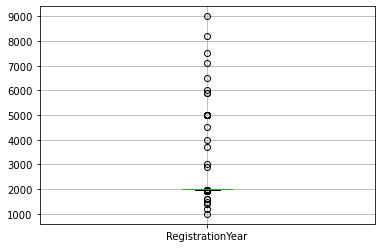

In [35]:
data_reg = data[['RegistrationYear']]. copy ()
data_reg.boxplot()
#plt.ylim(0,3000)

In [36]:
data = data.loc[(data['RegistrationYear'] > 1970) & (data['RegistrationYear'] <= 2022)]
data.shape

(318159, 16)

In [41]:
data['DateCrawled'] = data['DateCrawled'].astype('datetime64')

In [45]:
data['CrawledYear'] = data['DateCrawled'].dt.year
#print(data.head(5))

In [47]:
data = data.query('RegistrationYear <= CrawledYear')
data.shape

(307145, 17)

In [50]:
data['Price'].value_counts()

0        6642
500      4712
1500     4549
1200     3886
1000     3782
         ... 
4688        1
7596        1
5111        1
15445       1
8188        1
Name: Price, Length: 3598, dtype: int64

In [51]:
data['Power'].value_counts()

0        21451
75       21254
60       14079
150      13373
101      12082
         ...  
15020        1
1704         1
2729         1
1870         1
1653         1
Name: Power, Length: 663, dtype: int64

In [53]:
data = data.query('Power != 0 and Price!=0 ')
data.shape

(280366, 17)

### Удаление ненужных признаков

In [54]:
data = data.drop(['DateCrawled', 'CrawledYear', 'RegistrationMonth',  'DateCreated', 'LastSeen'], axis=1)

In [58]:
display(data.head(5))

,index,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,NumberOfPictures,PostalCode
0,2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown,0,90480
1,3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,0,91074
2,4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,0,60437
3,5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,0,33775
4,6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no,0,67112


In [57]:
data = data.reset_index()

### Типы данных

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280366 entries, 0 to 280365
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             280366 non-null  int64 
 1   Price             280366 non-null  int64 
 2   VehicleType       280366 non-null  object
 3   RegistrationYear  280366 non-null  int64 
 4   Gearbox           280366 non-null  object
 5   Power             280366 non-null  int64 
 6   Model             280366 non-null  object
 7   Kilometer         280366 non-null  int64 
 8   FuelType          280366 non-null  object
 9   Brand             280366 non-null  object
 10  Repaired          280366 non-null  object
 11  NumberOfPictures  280366 non-null  int64 
 12  PostalCode        280366 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 27.8+ MB


## Обучение моделей

In [60]:
X = data.drop(['Price'], axis=1)
y = data['Price']

In [61]:
X

,index,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,NumberOfPictures,PostalCode
0,2,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown,0,90480
1,3,small,2001,manual,75,golf,150000,petrol,volkswagen,no,0,91074
2,4,small,2008,manual,69,fabia,90000,gasoline,skoda,no,0,60437
3,5,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,0,33775
4,6,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no,0,67112
...,...,...,...,...,...,...,...,...,...,...,...,...
280361,354361,unknown,2016,auto,150,159,150000,unknown,alfa_romeo,no,0,51371
280362,354362,sedan,2004,manual,225,leon,150000,petrol,seat,yes,0,96465
280363,354366,convertible,2000,auto,101,fortwo,125000,petrol,smart,no,0,26135
280364,354367,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no,0,87439


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

In [63]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

num_columns = numerical_columns_selector(data)
cat_columns = categorical_columns_selector(data)
num_columns.remove('Price')

In [64]:
print(num_columns)

['index', 'RegistrationYear', 'Power', 'Kilometer', 'NumberOfPictures', 'PostalCode']


In [65]:
print(cat_columns)

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']


In [66]:
data['Repaired'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [67]:
num_pipline = Pipeline([('scaler', StandardScaler()),
                        ('drop_correlations', DropCorrelatedFeatures())])

columns_pipeline=ColumnTransformer([('num_cols', num_pipline, num_columns),
                                    ('category_encoder',
                                        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=10001), cat_columns)])
columns_pipeline

ColumnTransformer(transformers=[('num_cols',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('drop_correlations',
                                                  DropCorrelatedFeatures())]),
                                 ['index', 'RegistrationYear', 'Power',
                                  'Kilometer', 'NumberOfPictures',
                                  'PostalCode']),
                                ('category_encoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=10001),
                                 ['VehicleType', 'Gearbox', 'Model', 'FuelType',
                                  'Brand', 'Repaired'])])

In [68]:
pipeline = make_pipeline(columns_pipeline, DropDuplicateFeatures())
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('drop_correlations',
                                                                   DropCorrelatedFeatures())]),
                                                  ['index', 'RegistrationYear',
                                                   'Power', 'Kilometer',
                                                   'NumberOfPictures',
                                                   'PostalCode']),
                                                 ('category_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=10001),
                                                  ['VehicleType', 'Gearbox',
                                                   'Model', 'FuelType', 'Brand',
                                                   'Repaired'])])),
                ('dropduplicatefeatures', DropDuplicateFeatures())])

### Random Forest

In [71]:
pipeline.steps.append(('mod', RandomForestRegressor()))
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('drop_correlations',
                                                                   DropCorrelatedFeatures())]),
                                                  ['index', 'RegistrationYear',
                                                   'Power', 'Kilometer',
                                                   'NumberOfPictures',
                                                   'PostalCode']),
                                                 ('category_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=10001),
                                                  ['VehicleType', 'Gearbox',
                                                   'Model', 'FuelType', 'Brand',
                                                   'Repaired'])])),
                ('dropduplicatefeatures', DropDuplicateFeatures()),
                ('mod', RandomForestRegressor())])

In [72]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [73]:
rmse_scorer = make_scorer(rmse,greater_is_better=False)

In [74]:
params_RF = [{
        'mod__n_estimators': range(2,70),
        'mod__max_depth': range(5,50),
        
    }]

grid_RF = RandomizedSearchCV(pipeline,
                    params_RF,
                    n_iter=30,
                    cv=3,
                    verbose=1,
                    random_state=RS,
                    scoring=rmse_scorer,
                    n_jobs=-1,
                    error_score='raise')

In [75]:
%%time

grid_RF.fit(X_train, y_train)
#в этой ячейке иногда вонзникает ошибка, но если перезапустить ядро и весь код, то 
#все начинает работать


Fitting 3 folds for each of 30 candidates, totalling 90 fits
CPU times: user 1min 45s, sys: 3.59 s, total: 1min 48s
Wall time: 18min 26s


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_cols',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler()),
                                                                                               ('drop_correlations',
                                                                                                DropCorrelatedFeatures())]),
                                                                               ['index',
                                                                                'RegistrationYear',
                                                                                'Power',
                                                                                'Kilometer',
                                                                                'NumberOfPictures',
                                                                                'PostalCode']),
                                                                              ('category_encoder',
                                                                               OrdinalEncoder(handl...
                                                                                              unknown_value=10001),
                                                                               ['VehicleType',
                                                                                'Gearbox',
                                                                                'Model',
                                                                                'FuelType',
                                                                                'Brand',
                                                                                'Repaired'])])),
                                             ('dropduplicatefeatures',
                                              DropDuplicateFeatures()),
                                             ('mod', RandomForestRegressor())]),
                   n_iter=30, n_jobs=-1,
                   param_distributions=[{'mod__max_depth': range(5, 50),
                                         'mod__n_estimators': range(2, 70)}],
                   random_state=12345,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=1)

In [50]:
grid_RF.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('drop_correlations',
                                                                   DropCorrelatedFeatures())]),
                                                  ['RegistrationYear', 'Power',
                                                   'Kilometer',
                                                   'NumberOfPictures',
                                                   'PostalCode']),
                                                 ('category_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=10001),
                                                  ['VehicleType', 'Gearbox',
                                                   'Model', 'FuelType', 'Brand',
                                                   'Repaired'])])),
                ('dropduplicatefeatures', DropDuplicateFeatures()),
                ('mod', RandomForestRegressor(max_depth=38, n_estimators=69))])

In [51]:
model_RF = grid_RF.best_estimator_

In [52]:
grid_RF.best_score_*(-1)
#значение отрицательное, тк это особенность работы GridSearch

1710.7224341954152

In [77]:
grid_res = pd.DataFrame(grid_RF.cv_results_).sort_values(by='rank_test_score')

In [78]:
grid_res.iloc[0]['mean_fit_time'], grid_res.iloc[0]['mean_score_time']

(177.88068771362305, 10.259422699610392)

In [79]:
RF_fit_time = grid_res.iloc[0]['mean_fit_time']
RF_score_time = grid_res.iloc[0]['mean_score_time']

In [80]:
pipeline.steps.pop(2)
#pipeline

('mod', RandomForestRegressor())

Random Forest слишком медлительная моедль для нас. Рассмотрим другие

### CatBoostRegressor

In [81]:
pipeline.steps.append(('mod', CatBoostRegressor()))
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('drop_correlations',
                                                                   DropCorrelatedFeatures())]),
                                                  ['index', 'RegistrationYear',
                                                   'Power', 'Kilometer',
                                                   'NumberOfPictures',
                                                   'PostalCode']),
                                                 ('category_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=10001),
                                                  ['VehicleType', 'Gearbox',
                                                   'Model', 'FuelType', 'Brand',
                                                   'Repaired'])])),
                ('dropduplicatefeatures', DropDuplicateFeatures()),
                ('mod',
                 <catboost.core.CatBoostRegressor object at 0x7f786cda18e0>)])

In [82]:
params_CB = [{
        'mod__learning_rate':[0.1, 0.5, 0.8]
    }]

grid_CB = RandomizedSearchCV(pipeline,
                    params_CB,
                    n_iter=100,
                    cv=3,
                    verbose=1,
                    random_state=RS,
                    scoring=rmse_scorer,
                    error_score='raise')

In [83]:
%%time

grid_CB.fit(X_train, y_train)

/Users/renatapyatkova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
0:	learn: 4310.2773844	total: 79.9ms	remaining: 1m 19s
1:	learn: 4035.5129278	total: 92.4ms	remaining: 46.1s
2:	learn: 3795.7473575	total: 104ms	remaining: 34.6s
3:	learn: 3583.7188382	total: 115ms	remaining: 28.7s
4:	learn: 3398.7524606	total: 126ms	remaining: 25.1s
5:	learn: 3231.6887504	total: 136ms	remaining: 22.5s
6:	learn: 3083.0832942	total: 144ms	remaining: 20.5s
7:	learn: 2962.9284326	total: 151ms	remaining: 18.8s
8:	learn: 2854.8512948	total: 159ms	remaining: 17.5s
9:	learn: 2755.8314726	total: 167ms	remaining: 16.5s
10:	learn: 2669.6796005	total: 173ms	remaining: 15.6s
11:	learn: 2594.7125493	total: 181ms	remaining: 14.9s
12:	learn: 2528.7947861	total: 187ms	remaining: 14.2s
13:	learn: 2470.4276882	total: 194ms	remaining: 13.7s
14:	learn: 2423.1216311	total: 201ms	remaining: 13.2s
15:	learn: 2375.5295128	total: 209ms	remaining: 12.8s
16:	learn: 2335.1233416	total: 216ms	remaining: 12.5s
17:	learn: 2298.2265234	total:

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_cols',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler()),
                                                                                               ('drop_correlations',
                                                                                                DropCorrelatedFeatures())]),
                                                                               ['index',
                                                                                'RegistrationYear',
                                                                                'Power',
                                                                                'Kilometer',
                                                                                'NumberOfPictures',
                                                                                'PostalCode']),
                                                                              ('category_encoder',
                                                                               OrdinalEncoder(handl...
                                                                                              unknown_value=10001),
                                                                               ['VehicleType',
                                                                                'Gearbox',
                                                                                'Model',
                                                                                'FuelType',
                                                                                'Brand',
                                                                                'Repaired'])])),
                                             ('dropduplicatefeatures',
                                              DropDuplicateFeatures()),
                                             ('mod',
                                              <catboost.core.CatBoostRegressor object at 0x7f786cda18e0>)]),
                   n_iter=100,
                   param_distributions=[{'mod__learning_rate': [0.1, 0.5,
                                                                0.8]}],
                   random_state=12345,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=1)

In [84]:
grid_CB.best_estimator_
# почему не отображаются лучшие параметры???

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('drop_correlations',
                                                                   DropCorrelatedFeatures())]),
                                                  ['index', 'RegistrationYear',
                                                   'Power', 'Kilometer',
                                                   'NumberOfPictures',
                                                   'PostalCode']),
                                                 ('category_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=10001),
                                                  ['VehicleType', 'Gearbox',
                                                   'Model', 'FuelType', 'Brand',
                                                   'Repaired'])])),
                ('dropduplicatefeatures', DropDuplicateFeatures()),
                ('mod',
                 <catboost.core.CatBoostRegressor object at 0x7f78ed7c4220>)])

In [85]:
model_CB = grid_CB.best_estimator_

In [86]:
grid_CB.best_score_*(-1)


1551.94071286442

In [87]:
grid_CB.best_params_

{'mod__learning_rate': 0.5}

In [88]:
grid_res = pd.DataFrame(grid_CB.cv_results_).sort_values(by='rank_test_score')

In [89]:
grid_res.iloc[0]['mean_fit_time'], grid_res.iloc[0]['mean_score_time']

(14.968997319539389, 0.21843798955281576)

In [90]:
CB_fit_time = grid_res.iloc[0]['mean_fit_time']
CB_score_time = grid_res.iloc[0]['mean_score_time']

In [91]:
pipeline.steps.pop(2)

('mod', <catboost.core.CatBoostRegressor at 0x7f786cda18e0>)

2 минуты работы и метрика меньше, Catboost уже лучше чем RF

###  LGBMRegressor

In [92]:
from lightgbm import LGBMRegressor

In [93]:
pipeline.steps.append(('mod', LGBMRegressor()))
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('drop_correlations',
                                                                   DropCorrelatedFeatures())]),
                                                  ['index', 'RegistrationYear',
                                                   'Power', 'Kilometer',
                                                   'NumberOfPictures',
                                                   'PostalCode']),
                                                 ('category_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=10001),
                                                  ['VehicleType', 'Gearbox',
                                                   'Model', 'FuelType', 'Brand',
                                                   'Repaired'])])),
                ('dropduplicatefeatures', DropDuplicateFeatures()),
                ('mod', LGBMRegressor())])

In [94]:
params_LG = [{
        'mod__num_leaves':[31, 100, 200], 
        'mod__learning_rate':[0.1, 0.3, 0.5]
    }]

grid_LG = RandomizedSearchCV(pipeline,
                    params_LG,
                    n_iter=100,
                    cv=3,
                    verbose=1,
                    random_state=RS,
                    scoring=rmse_scorer,
                    n_jobs=-1,
                    error_score='raise')

In [95]:
%%time

grid_LG.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/renatapyatkova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 29.2 s, sys: 2.24 s, total: 31.4 s
Wall time: 53.4 s


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_cols',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler()),
                                                                                               ('drop_correlations',
                                                                                                DropCorrelatedFeatures())]),
                                                                               ['index',
                                                                                'RegistrationYear',
                                                                                'Power',
                                                                                'Kilometer',
                                                                                'NumberOfPictures',
                                                                                'PostalCode']),
                                                                              ('category_encoder',
                                                                               OrdinalEncoder(handl...
                                                                                              unknown_value=10001),
                                                                               ['VehicleType',
                                                                                'Gearbox',
                                                                                'Model',
                                                                                'FuelType',
                                                                                'Brand',
                                                                                'Repaired'])])),
                                             ('dropduplicatefeatures',
                                              DropDuplicateFeatures()),
                                             ('mod', LGBMRegressor())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'mod__learning_rate': [0.1, 0.3, 0.5],
                                         'mod__num_leaves': [31, 100, 200]}],
                   random_state=12345,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=1)

In [96]:
grid_LG.best_score_

-1538.2807313522164

In [97]:
model_LG = grid_LG.best_estimator_

In [98]:
grid_LG.best_params_

{'mod__num_leaves': 200, 'mod__learning_rate': 0.1}

In [101]:
grid_res = pd.DataFrame(grid_LG.cv_results_).sort_values(by='rank_test_score')

In [102]:
grid_res.iloc[0]['mean_fit_time'], grid_res.iloc[0]['mean_score_time']

(8.86302391688029, 4.327852487564087)

In [103]:
LG_fit_time = grid_res.iloc[0]['mean_fit_time']
LG_score_time = grid_res.iloc[0]['mean_score_time']

In [104]:
pipeline.steps.pop(2)

('mod', LGBMRegressor())

40 секунд и лучшая метрика качества

## Выбор лучшей модели 

In [109]:
d = {"score":pd.Series([grid_RF.best_score_, grid_CB.best_score_, grid_LG.best_score_], index=['RF', 'CB', 'LG']),
   ...: "FitTime": pd.Series([RF_fit_time,CB_fit_time,LG_fit_time], index=['RF', 'CB', 'LG']),
   ...: 'ScoreTime': pd.Series([RF_score_time,CB_score_time,LG_score_time], index=['RF', 'CB', 'LG'])}
df1 = pd.DataFrame(d)
display(df1)

,score,FitTime,ScoreTime
RF,-1588.951947,177.880688,10.259423
CB,-1551.940713,14.968997,0.218438
LG,-1538.280731,8.863024,4.327852


Лучшей из трех моделей оказалась LightLGBM. Протестрируем ее на тестовых данных

In [105]:
predicted = model_LG.predict(X_test)
score = rmse(predicted, y_test)
print(score)

1553.9623245682967


**Вывод**: Таким образом, после обработки данных, заполнения пропусков, удаления выбросов, мы смогли обучить три модели машинного обучения RF^ Catbbost, LightLGBM. Модели градиентного бустинга справляются значительно быстрее RF и выдают результат гораздо точнее. Для получения окончательного результата использвовали модель LightLGBM